# fO2

In this notebook we benchmark MagmaPandas fO2 codes by reproducing calculations and/or figures from literature. When possible, we compare MagmaPandas results to results from codes or data provided with the original publication of the model.

### QFM

fO2 at QFM is calculated according to the method explained in van Gerve et al. (2004). This method is similar to the one implemented in the [online fO2 app by Michael Anenburg](https://fo2.rses.anu.edu.au/fo2app/). Here, the Anenburg implementation is compared to the one in MagmaPandas

In [1]:
from MagmaPandas.fO2 import QFM
from MagmaPandas.fO2 import IW
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import geoplot as gp

mm = 1 / 25.4


We import data calculated with the Anenburg app at 1 bar and 10 kbar, over a 600 - 1800 K temperature range

In [2]:
fO2_anenburg_file = "./data/fO2/QFM_anenburg.csv"

fO2_QFM = pd.read_csv(fO2_anenburg_file)
T_K = fO2_QFM["T_K"]
P_bar = fO2_QFM["P_bar"]

In [3]:
fO2_QFM["fO2_magmapandas"] = QFM.calculate_fO2(T_K=T_K, P_bar=P_bar, logshift=0)

/Users/thomas/Dropbox/research/python/packages/MagmaPandas/src/MagmaPandas/EOSs/tools.py:55: RuntimeWarning: invalid value encountered in sqrt
  Q2 = np.where(t > tc, 0, np.sqrt((tc - t) / tc0))


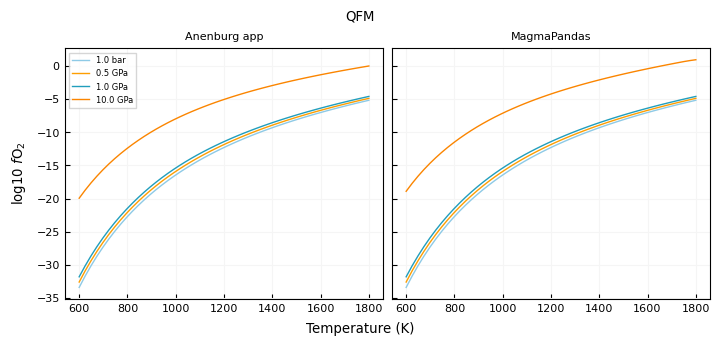

In [4]:
gp.layout(colors=gp.colors.hollywood)

fig, axs = plt.subplots(1, 2, figsize=(180*mm, 85*mm), sharex=True, sharey=True)

for pressure, df in fO2_QFM.groupby("P_bar"):

    label = f"{pressure} bar" if pressure < 100 else f"{pressure / 1e4} GPa"

    axs[0].plot(df["T_K"], np.log10(df["fO2"]), "-", label=label)
    axs[1].plot(df["T_K"], np.log10(df["fO2_magmapandas"]), "-")

axs[0].legend(frameon=True, fancybox=False)
axs[0].set_title("Anenburg app")
axs[1].set_title("MagmaPandas")

fig.supxlabel("Temperature (K)")
fig.supylabel("log10 $f$O$_2$")
fig.suptitle("QFM")

plt.show()

Note that there is a small difference in the pressure dependence visible at 10 GPa between the Anenburg app and MagmaPandas. This is most likely a result of the codes using different root-finding algorithms to solve the pressures of phase transitions. At the other calculated pressures, results are near identical.

### IW

fO2 at IW is calculated according to Hirschmann (2021). Here we compare Magmapandas results to those from the Matlabscript provided by the Hirschmann paper.

In [5]:
fO2_hirschmann_file = "./data/fO2/fO2_IW_hirschmann.csv"

fO2_IW = pd.read_csv(fO2_hirschmann_file)
T_K = fO2_IW["T_K"]
P_bar = fO2_IW["P_bar"]

In [6]:
fO2_IW["fO2_magmapandas"] = IW.calculate_fO2(T_K=T_K, P_bar=P_bar, logshift=0)

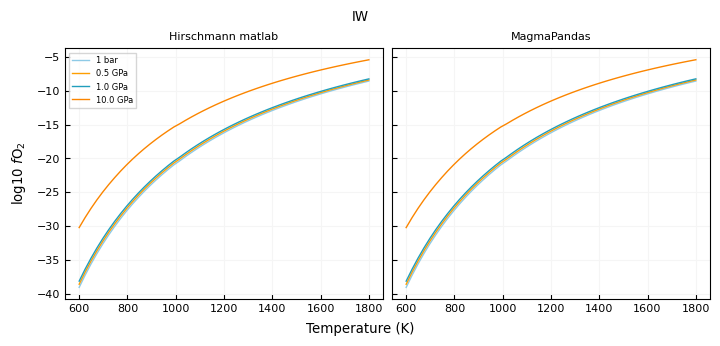

In [7]:
gp.layout(colors=gp.colors.hollywood)

fig, axs = plt.subplots(1, 2, figsize=(180*mm, 85*mm), sharex=True, sharey=True)

for pressure, df in fO2_IW.groupby("P_bar"):

    label = f"{pressure} bar" if pressure < 100 else f"{pressure / 1e4} GPa"

    axs[0].plot(df["T_K"], np.log10(df["fO2"]), "-", label=label)
    axs[1].plot(df["T_K"], np.log10(df["fO2_magmapandas"]), "-", label=label)


axs[0].legend(frameon=True, fancybox=False)
axs[0].set_title("Hirschmann matlab")
axs[1].set_title("MagmaPandas")

# axs[1].set_ylim(-0.1, 0.1)

fig.supxlabel("Temperature (K)")
fig.supylabel("log10 $f$O$_2$")
fig.suptitle("IW")

plt.show()